In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
clinical_drug_trial_df = pd.merge(clinical_trial_data, mouse_drug_data, on=["Mouse ID"], how="left")


# Display the data table for preview
clinical_drug_trial_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_timepoint_group = clinical_drug_trial_df.groupby(['Drug','Timepoint'])
mean_tumor_volume = drug_timepoint_group['Tumor Volume (mm3)'].mean()

# Convert to DataFrame
mean_tumor_volume_df = pd.DataFrame(mean_tumor_volume).reset_index()
# print(mean_tumor_volume_df)

# Preview DataFrame
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
std_tumor_volumes = drug_timepoint_group['Tumor Volume (mm3)'].sem()

# Convert to DataFrame
std_tumor_volumes_df = pd.DataFrame(std_tumor_volumes).reset_index()

# Preview DataFrame
std_tumor_volumes_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_pivot = mean_tumor_volume_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
std_tumor_volumes_pivot = std_tumor_volumes_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mean_tumor_volume_pivot.head()
std_tumor_volumes_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


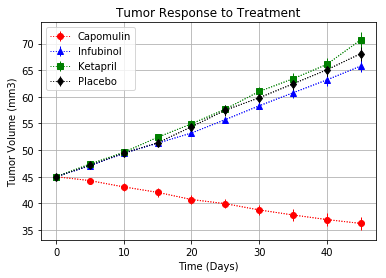

In [28]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
mtv_df = mean_tumor_volume_pivot
stv_df = std_tumor_volumes_pivot

mtv_timepoint=mtv_df.index


drug_list=['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
markers=['o','^','s','d']
colors=['red','blue','green','black']

i = 0
for drug in drug_list:
    ax.errorbar(mtv_timepoint, mtv_df[drug], yerr=stv_df[drug], marker=markers[i], linestyle=':', color=colors[i], linewidth=1)
    i+=1
    
plt.legend(loc="best")

i = 0
for drug in drug_list:
    plt.plot(mtv_timepoint, mtv_df[drug], linestyle=':', color=colors[i], linewidth=1)
    i+=1

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()

           
# Save the Figure
plt.savefig('tumor_response.png', dpi=300, format='png', bbox_inches='tight')

# Show the Figure
plt.show()


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
drug_time_group2 = clinical_drug_trial_df.groupby(['Drug','Timepoint'])
mean_metastatic_site = drug_time_group2['Metastatic Sites'].mean()

# Convert to DataFrame
mean_met_site_df = pd.DataFrame(mean_metastatic_site)
mean_met_site_df = pd.DataFrame(mean_metastatic_site).reset_index()

# Preview DataFrame
mean_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
std_metastatic_site = drug_time_group2['Metastatic Sites'].sem()

# Convert to DataFrame
std_met_site_df = pd.DataFrame(std_metastatic_site)
std_met_site_df = pd.DataFrame(std_metastatic_site).reset_index()

# Preview DataFrame
std_met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_site_pivot = mean_met_site_df.pivot(index='Timepoint',  columns='Drug', values='Metastatic Sites')
std_met_site_pivot = std_met_site_df.pivot(index='Timepoint',  columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
mean_met_site_pivot.head()
std_met_site_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


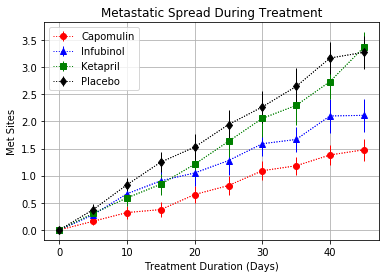

In [27]:
# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()
mms_df = mean_met_site_pivot
sms_df = std_met_site_pivot

mms_timepoint=mtv_df.index

i=0
for drug in drug_list:
    ax.errorbar(mms_timepoint, mms_df[drug], yerr=sms_df[drug], linestyle=':', color=colors[i], marker=markers[i], linewidth=1)
    i+=1

plt.legend(loc="best")

i = 0
for drug in drug_list:
    plt.plot(mms_timepoint, mms_df[drug], linestyle=':', color=colors[i], linewidth=1)
    i+=1

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met Sites")
plt.grid()

# Save the Figure
plt.savefig('metastatic_spread.png', dpi=300, format='png', bbox_inches='tight')

# Show the Figure
plt.show()

## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse_count = drug_time_group2['Mouse ID'].count()
mouse_count

# Convert to DataFrame
survival_df = pd.DataFrame(mouse_count)
survival_df = pd.DataFrame(mouse_count).reset_index()

# # Preview DataFrame
survival_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate_pivot = survival_df.pivot(index='Timepoint',  columns='Drug', values='Mouse ID')
# Preview the Data Frame
survival_rate_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


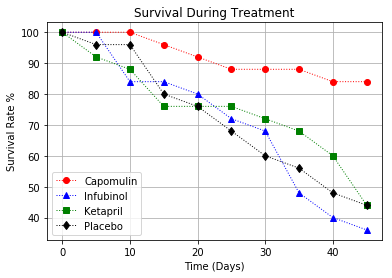

In [25]:
# Generate the Plot (Accounting for percentages)
fig, ax = plt.subplots()
sr_df = survival_rate_pivot

sr_timepoint=sr_df.index

i = 0
for drug in drug_list:
    plt.plot(sr_timepoint, (sr_df[drug]/sr_df[drug].max()*100), marker=markers[i], color=colors[i], linestyle=':', linewidth=1)
    i+=1

plt.legend(loc='best')
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate %")
plt.grid()

# Save the Figure
plt.savefig('survival_during_treatment.png', dpi=300, format='png', bbox_inches='tight')

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
print(mtv_df.index)
percent_change = (mtv_df.loc[45]-mtv_df.loc[0])/mtv_df.loc[0]*100
print(percent_change)
percent_change_drugs = (mtv_df.loc[45,drug_list]-mtv_df.loc[0,drug_list])/mtv_df.loc[0,drug_list]*100

# Display the data to confirm
print(percent_change_drugs)

Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')
Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64
Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64


(-19.475302667894173, 46.12347172785184, 57.028794686606076, 51.29796048315153)
('Capomulin', 'Infubinol', 'Ketapril', 'Placebo')
[0 1 2 3]


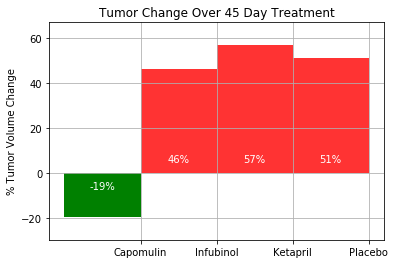

In [37]:
# Store all Relevant Percent Changes into a Tuple
percent_change_tuple = tuple(percent_change_drugs)
performance = percent_change_tuple
print(performance)

drug_list_tuple = tuple(drug_list)
print(drug_list_tuple)

y_pos = np.arange(len(drug_list_tuple))
print(y_pos)

# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 
# Use functions to label the percentages of changes

plt.ylim(min(performance)-10,max(performance)+10)
plt.grid()
for drug in range(len(drug_list)):
    if performance[drug] > 0:
        growth = plt.bar(y_pos[drug], performance[drug], color = 'red', align = 'edge', alpha = 0.8, width = 1)
        plt.text(y_pos[drug]+0.5, 4, '%d' % int(performance[drug])+'%', ha='center', va='bottom', color='white')
    else:
        reduction = plt.bar(y_pos[drug], performance[drug], color = 'green', align = 'edge', alpha = 1, width = 1)
        plt.text(y_pos[drug]+0.5, -8, '%d' % int(performance[drug])+'%', ha='center', va='bottom', color='white')


# Call functions to implement the function calls
plt.xticks(y_pos+1, drug_list_tuple)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change Over 45 Day Treatment')

# Save the Figure
plt.savefig('tumor_change.png', dpi=300, format='png', bbox_inches='tight')

# Show the Figure
fig.show()